In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv("C:/Users/gaonk/OneDrive/Desktop/ML/MLPractice/ML Dataset/ML Dataset/Obesity_Classification.csv")
print(data.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [30]:
data = pd.DataFrame(data)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
print(data.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25       0     175      80  25.3  Normal Weight
1   2   30       1     160      60  22.5  Normal Weight
2   3   35       0     180      90  27.3     Overweight
3   4   40       1     150      50  20.0    Underweight
4   5   45       0     190     100  31.2          Obese


In [31]:
data['Label'] = data['Label'].map({'Underweight': 1, 'Normal Weight': 2, 'Overweight': 3, 'Obese': 4})
print(data.head())

   ID  Age  Gender  Height  Weight   BMI  Label
0   1   25       0     175      80  25.3      2
1   2   30       1     160      60  22.5      2
2   3   35       0     180      90  27.3      3
3   4   40       1     150      50  20.0      1
4   5   45       0     190     100  31.2      4


In [32]:
print(data.tail())

      ID  Age  Gender  Height  Weight  BMI  Label
103  106   11       0     175      10  3.9      1
104  107   16       1     160      10  3.9      1
105  108   21       0     180      15  5.6      1
106  109   26       1     150      15  5.6      1
107  110   31       0     190      20  8.3      1


In [33]:
print(data.nunique())

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64


In [34]:
print(data.isna().sum())

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [35]:
print(data.describe())

               ID         Age      Gender      Height      Weight         BMI  \
count  108.000000  108.000000  108.000000  108.000000  108.000000  108.000000   
mean    56.046296   46.555556    0.481481  166.574074   59.490741   20.549074   
std     31.917939   24.720620    0.501986   27.873615   28.856233    7.583818   
min      1.000000   11.000000    0.000000  120.000000   10.000000    3.900000   
25%     28.750000   27.000000    0.000000  140.000000   35.000000   16.700000   
50%     56.500000   42.500000    0.000000  175.000000   55.000000   21.200000   
75%     83.250000   59.250000    1.000000  190.000000   85.000000   26.100000   
max    110.000000  112.000000    1.000000  210.000000  120.000000   37.200000   

            Label  
count  108.000000  
mean     1.972222  
std      1.036334  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      4.000000  


In [36]:
print(data.mean())

ID         56.046296
Age        46.555556
Gender      0.481481
Height    166.574074
Weight     59.490741
BMI        20.549074
Label       1.972222
dtype: float64


In [37]:
print(data['Weight'].mean())
print(data['Weight'].median())
print(data['Weight'].mode())
print(data['Weight'].var())
print(data['Weight'].std())

59.49074074074074
55.0
0    75
Name: Weight, dtype: int64
832.6821564555208
28.856232540917755


In [38]:
Q1 = np.percentile(data['Weight'], 25)
Q3 = np.percentile(data['Weight'], 75)
IQR = Q3 - Q1
print(IQR)

50.0


In [39]:
weight_range = max(data['Weight']) - min(data['Weight'])
print(weight_range)

110


In [40]:
unique, counts = np.unique(data['Weight'], return_counts = True)
print(unique, counts)

[ 10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95
 100 105 110 115 120] [2 4 5 6 8 5 6 5 6 8 4 7 2 9 3 8 3 5 3 3 3 1 2]


In [41]:
print(np.corrcoef(data['Weight'], data['Height']))
print(data[['Weight','Height']].corr())

[[1.         0.42888995]
 [0.42888995 1.        ]]
         Weight   Height
Weight  1.00000  0.42889
Height  0.42889  1.00000


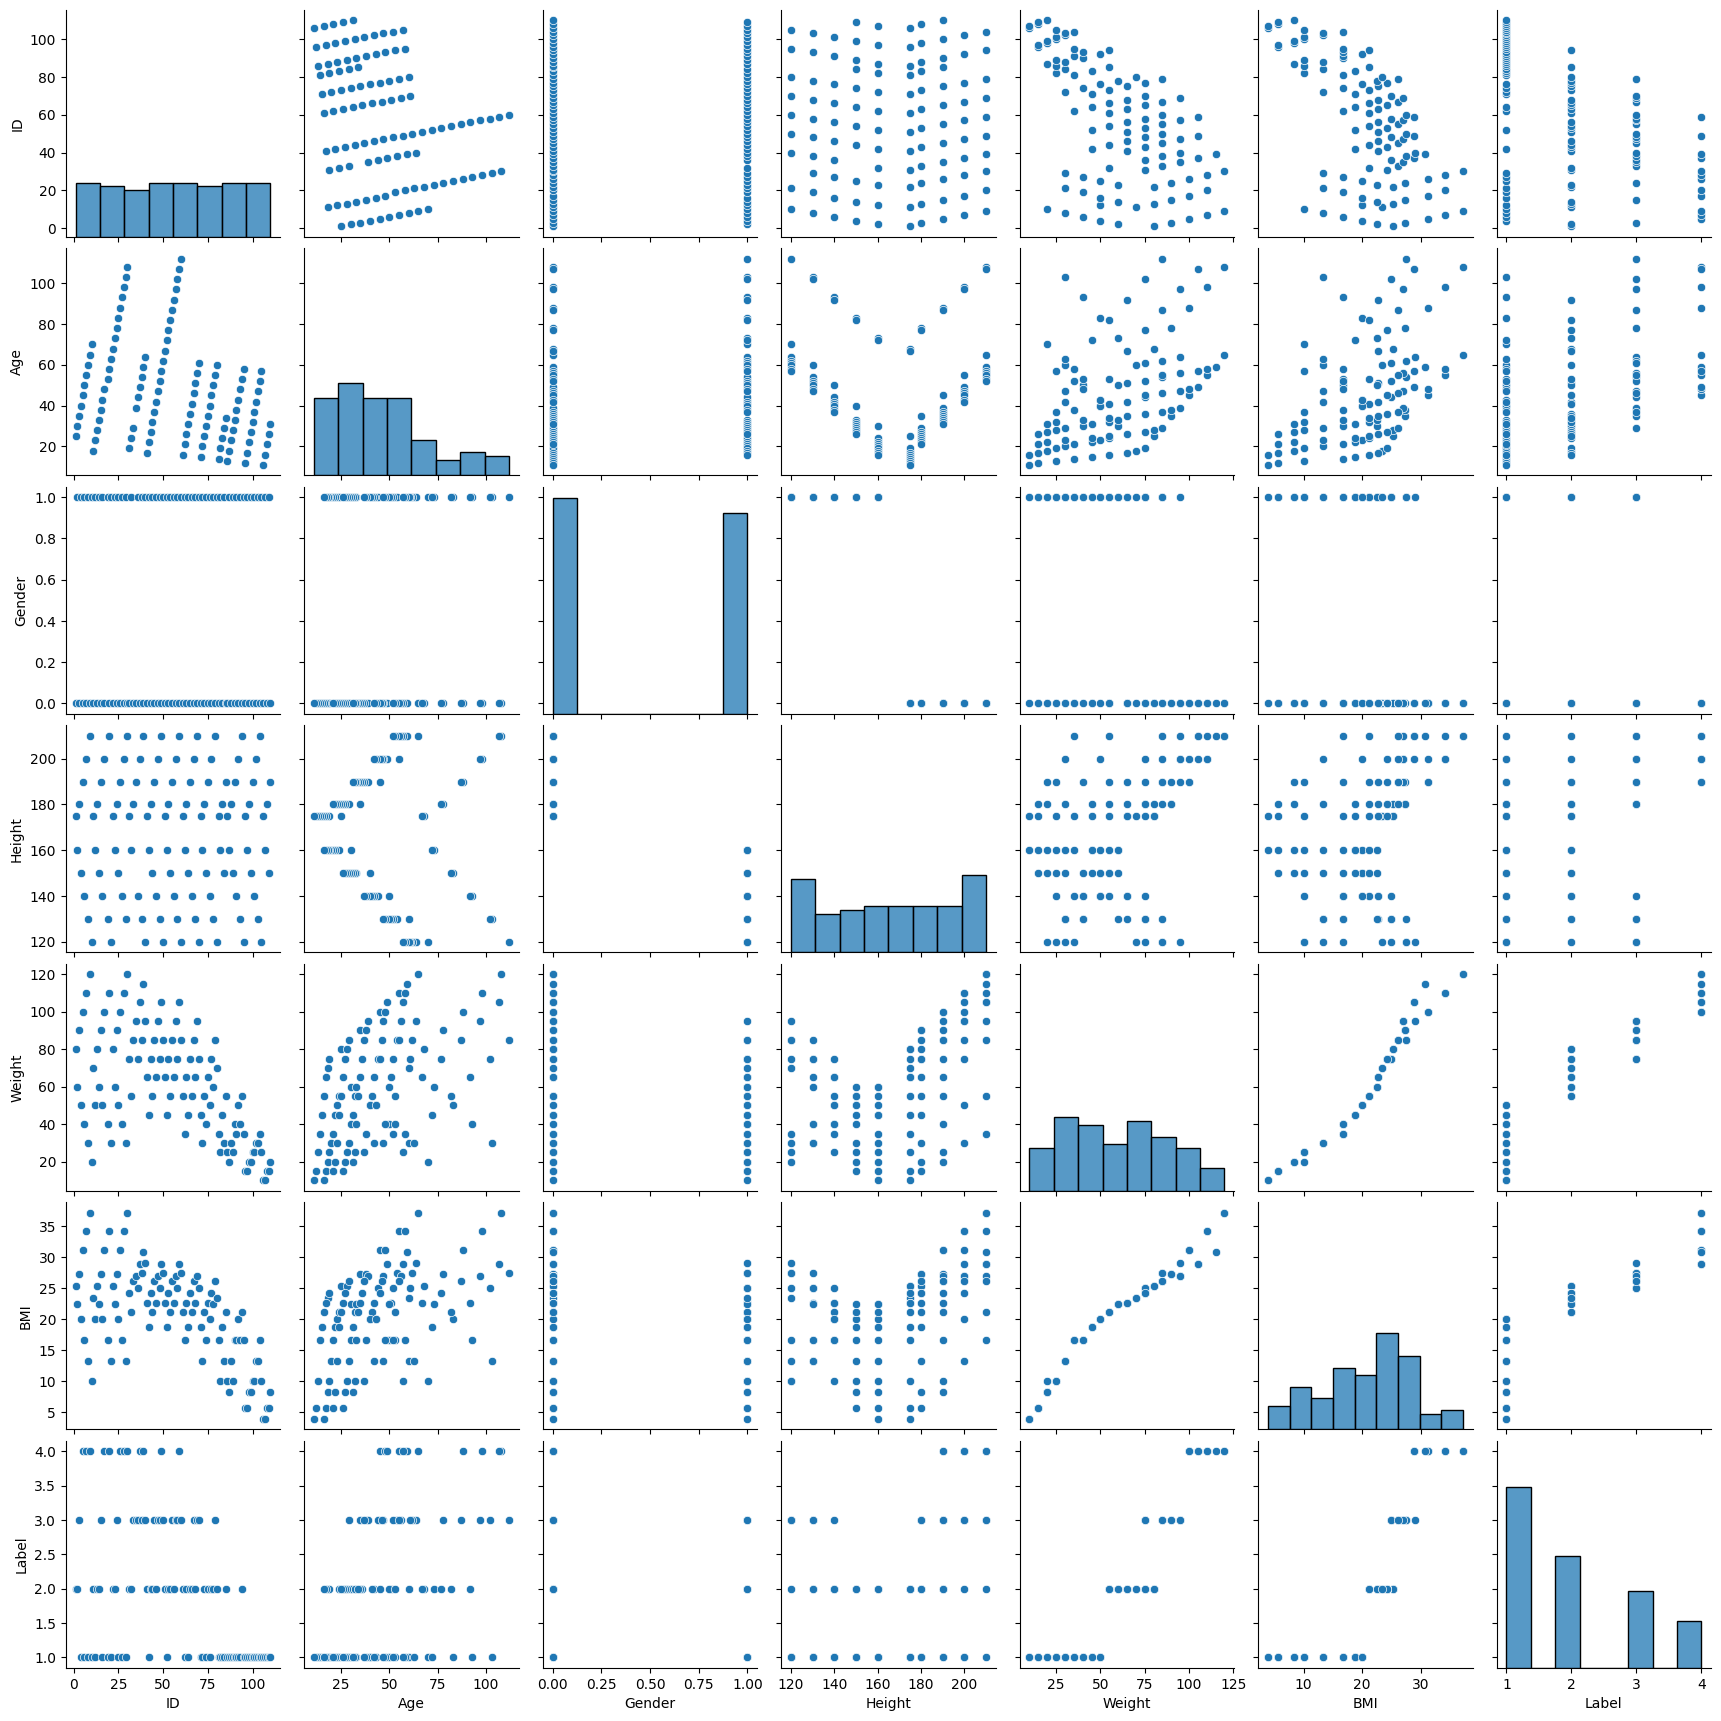

In [42]:
sns.pairplot(data)

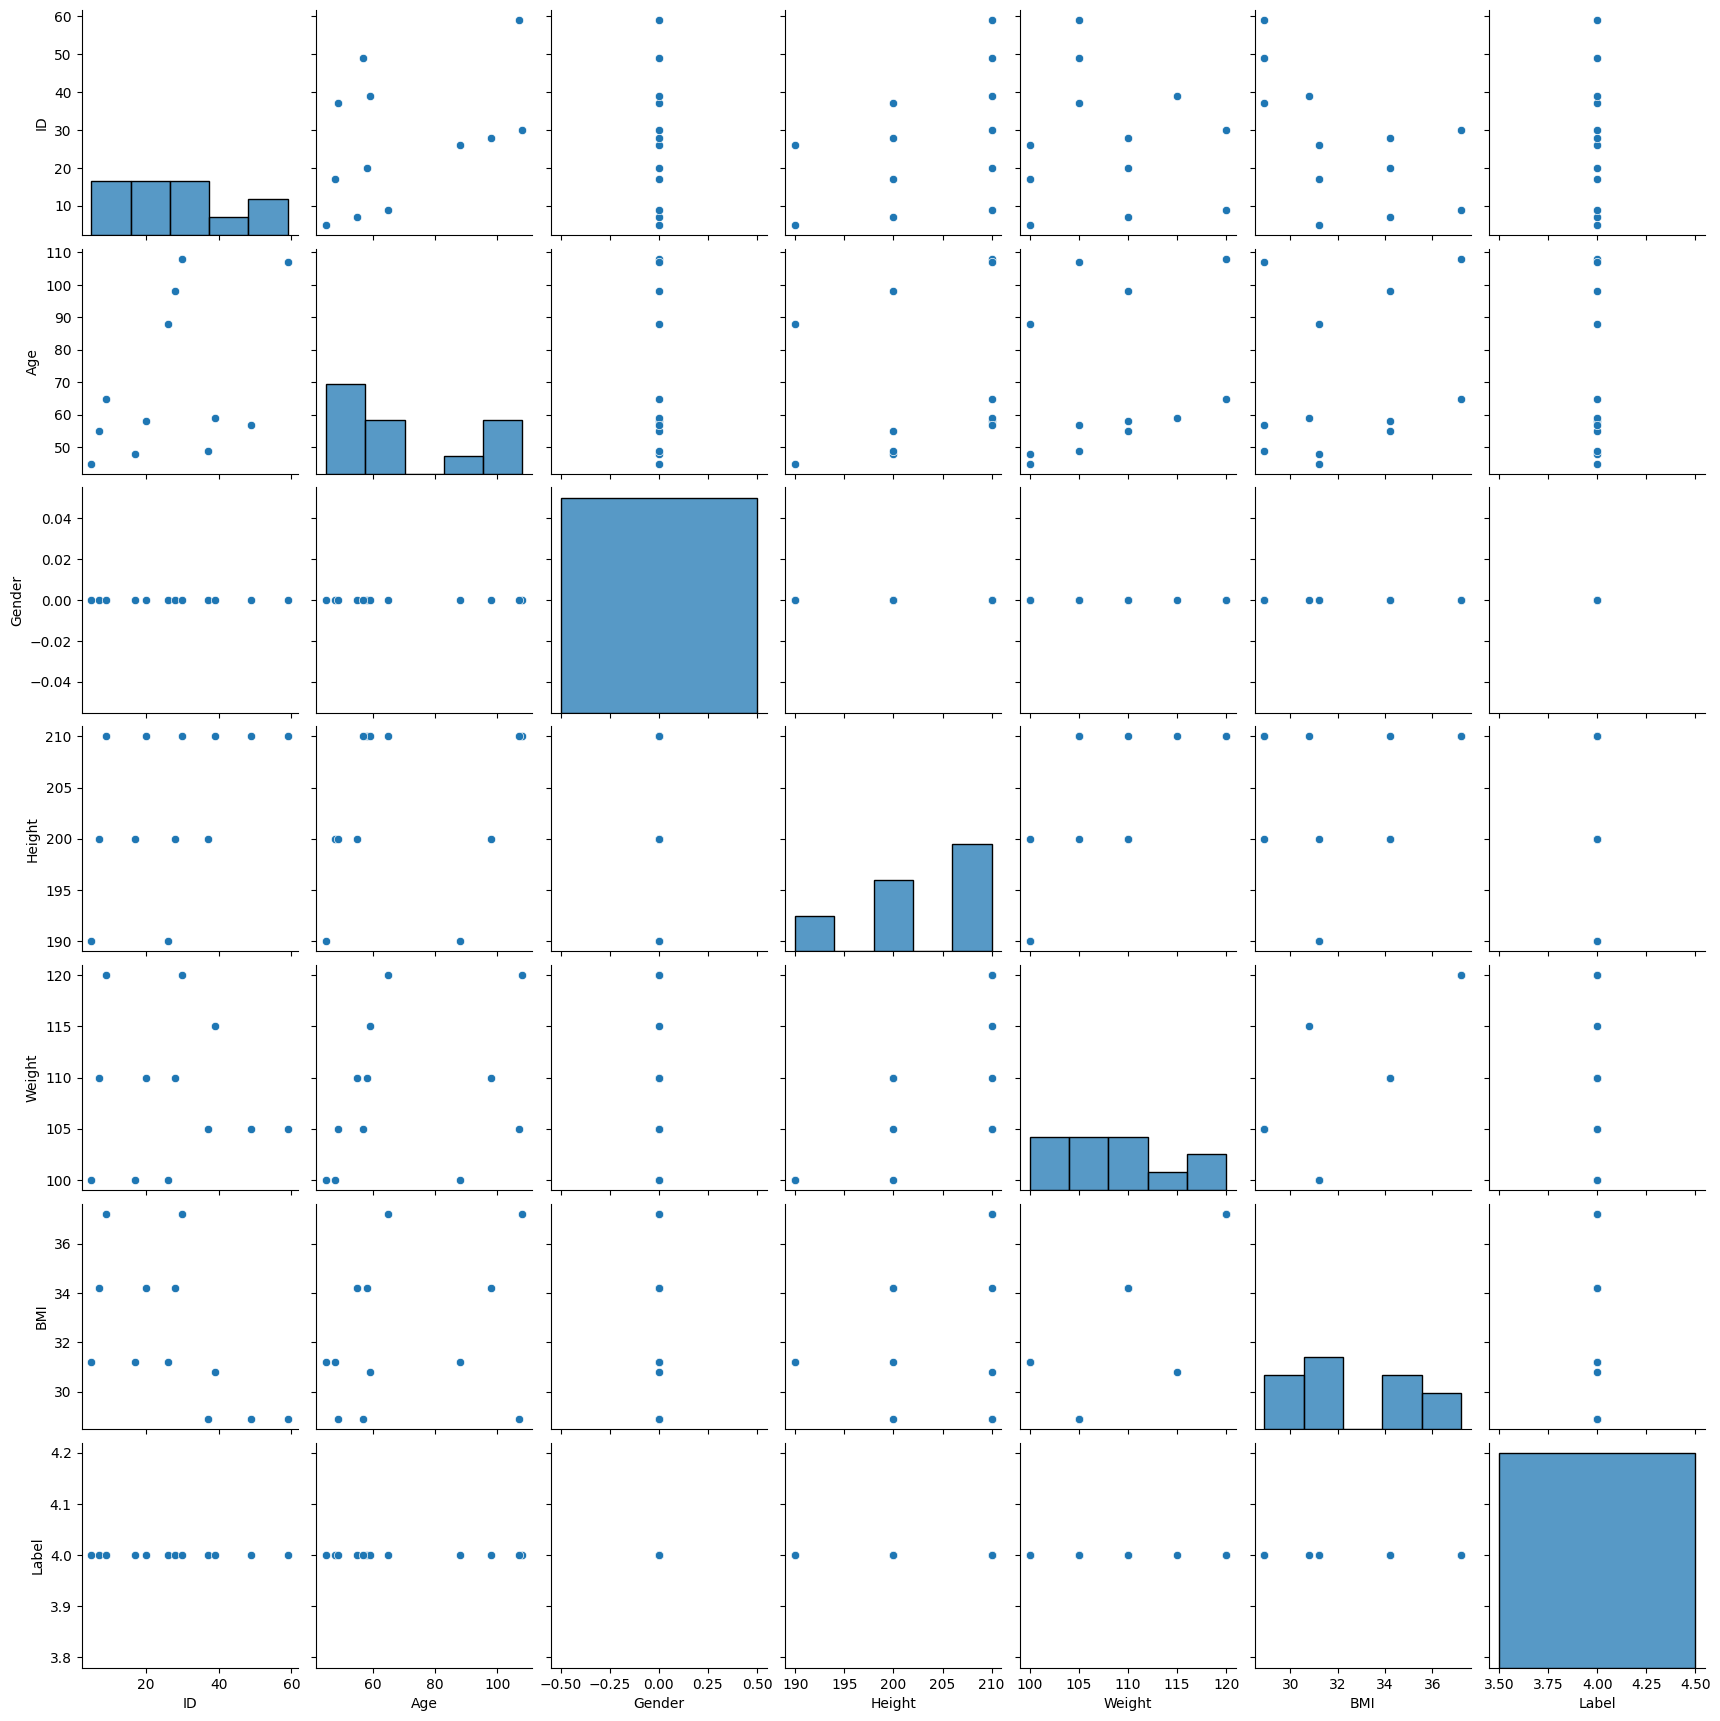

In [43]:
sns.pairplot(data[data['Label'] == 4])

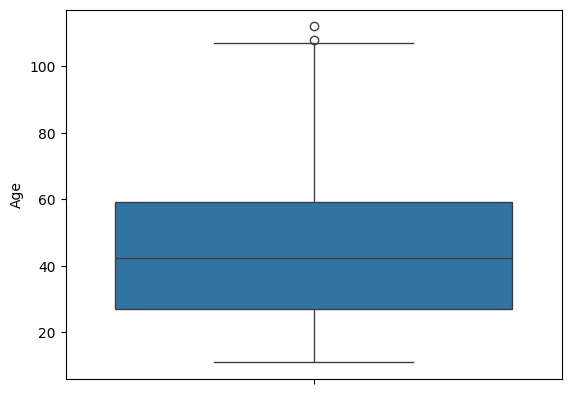

In [44]:
bxplt = sns.boxplot(data['Age'])
plt.show()

In [47]:
Q1 = np.percentile(data['Age'], 25)
Q3 = np.percentile(data['Age'], 75)
IQR = Q3 - Q1
print(IQR)

ll = Q1 - (6 * IQR)
ul = Q3 + (1.5 * IQR)

upper_outliers = data[data['Age'] > ul].index.tolist()
lower_outliers = data[data['Age'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True

if drop:
    data.drop(bad_indices, inplace = True, errors = 'ignore')
    print('Outliers from {} feature removed'.format(data['Age']))

31.0
Outliers from 0      25
1      30
2      35
3      40
4      45
       ..
103    11
104    16
105    21
106    26
107    31
Name: Age, Length: 105, dtype: int64 feature removed


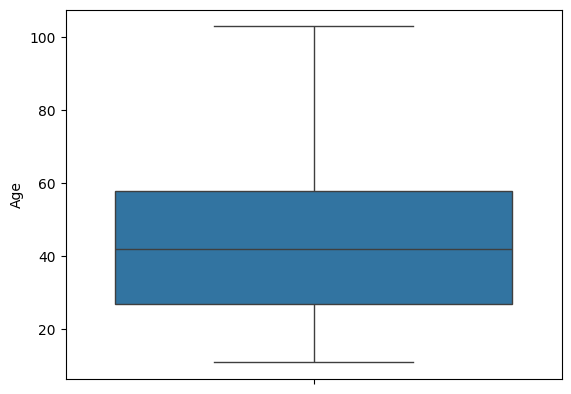

In [48]:
bxplt = sns.boxplot(data['Age'])
plt.show()